# How to Detect Heteroskedasticity in Time Series
Dec 21st 2022

In [9]:
import pandas as pd
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from pmdarima.datasets import load_airpassengers
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
TEST_NAMES = ['White', 'Breusch-Pagan', 'Goldfeld-Quandt']
FORMULA = 'value ~ time'

class Heteroskedasticity:
    @staticmethod
    def het_tests(series: pd.Series, test: str) -> float:
        """
        Testing for heteroskedasticity
        :param series: Univariate time series as pd.Series
        :param test: String denoting the test. One of 'white','goldfeldquandt', or 'breuschpagan'
        :return: p-value as a float.
        If the p-value is high, we accept the null hypothesis that the data is homoskedastic
        """
        assert test in TEST_NAMES, 'Unknown test'
        series = series.reset_index(drop=True).reset_index()
        series.columns = ['time', 'value']
        series['time'] += 1
        olsr = ols(FORMULA, series).fit()
        if test == 'White':
            _, p_value, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
        elif test == 'Goldfeld-Quandt':
            _, p_value, _ = sms.het_goldfeldquandt(olsr.resid, olsr.model.exog, alternative='two-sided')
        else:
            _, p_value, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)
        return p_value
    @classmethod
    def run_all_tests(cls, series: pd.Series):
        test_results = {k: cls.het_tests(series, k) for k in TEST_NAMES}
        return test_results

In [13]:
# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (13, 5)
plt.rcParams['figure.figsize']= plotsize
# Pandas config
pd.options.display.float_format= '{:,.4f}'.format

## 1) Input data

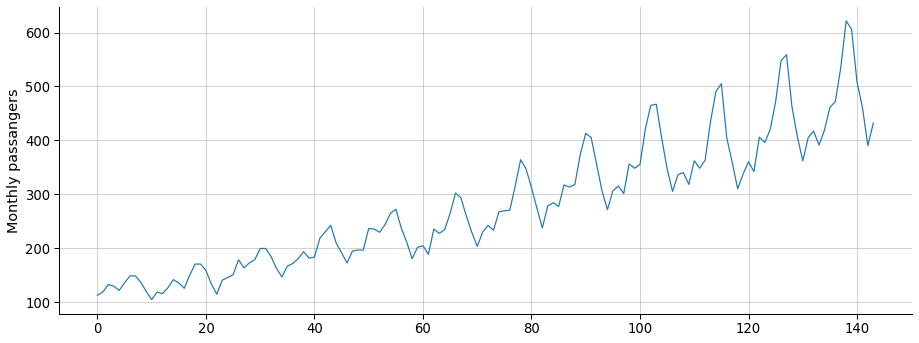

In [20]:
series = load_airpassengers(True)
series.plot()
plt.ylabel("Monthly passangers")
plt.grid(alpha= 0.7)
plt.tight_layout()

## 2) Statistical tests
* [White test](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_white.html#statsmodels.stats.diagnostic.het_white)
* [Breusch-Pagan test](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan)
* [Goldfeld–Quandt test](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html#statsmodels.stats.diagnostic.het_goldfeldquandt)

In [19]:
test_results = Heteroskedasticity.run_all_tests(series)
test_results

{'White': 4.345754466128593e-07,
 'Breusch-Pagan': 4.559001856883289e-07,
 'Goldfeld-Quandt': 8.812950329262079e-13}